## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [4]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car_price_df["carlength"]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

In [6]:
car_price_df["carwidth"]

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: carwidth, Length: 205, dtype: float64

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

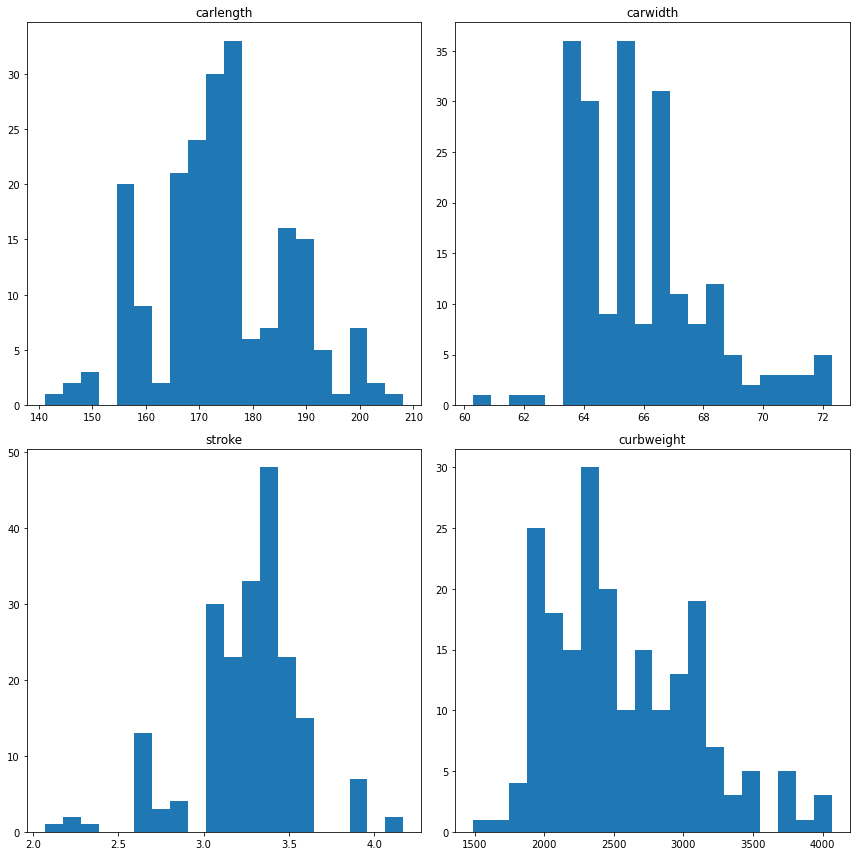

In [7]:
### Code here
data = car_price_df[['carlength','carwidth','stroke','curbweight']]
data.columns = [1, 2, 3, 4]
title = ['carlength','carwidth','stroke','curbweight']
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
axes = axes.ravel()

colors = ['r','g','b','y']
for i, ax in enumerate(axes):
    ax.hist(data[i+1], bins=20)  
    ax.set_title(title[i])

plt.tight_layout() 

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

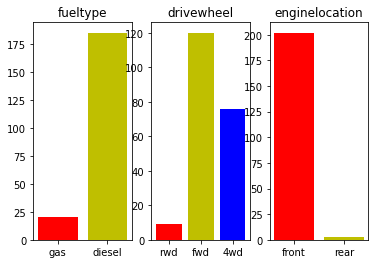

In [8]:
### Code here
COL_NUM = 3
ROW_NUM = 1
fig, axes = plt.subplots(ROW_NUM, COL_NUM)
axes[0].bar(list(car_price_df['fueltype'].unique()), list(car_price_df.groupby('fueltype').size()),color=['r','y','b'])
axes[1].bar(list(car_price_df['drivewheel'].unique()), list(car_price_df.groupby('drivewheel').size()),color=['r','y','b'])
axes[2].bar(list(car_price_df['enginelocation'].unique()), list(car_price_df.groupby('enginelocation').size()),color=['r','y','b'])

axes[0].set_title('fueltype')
axes[1].set_title('drivewheel')
axes[2].set_title('enginelocation')

plt.tight_layout

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

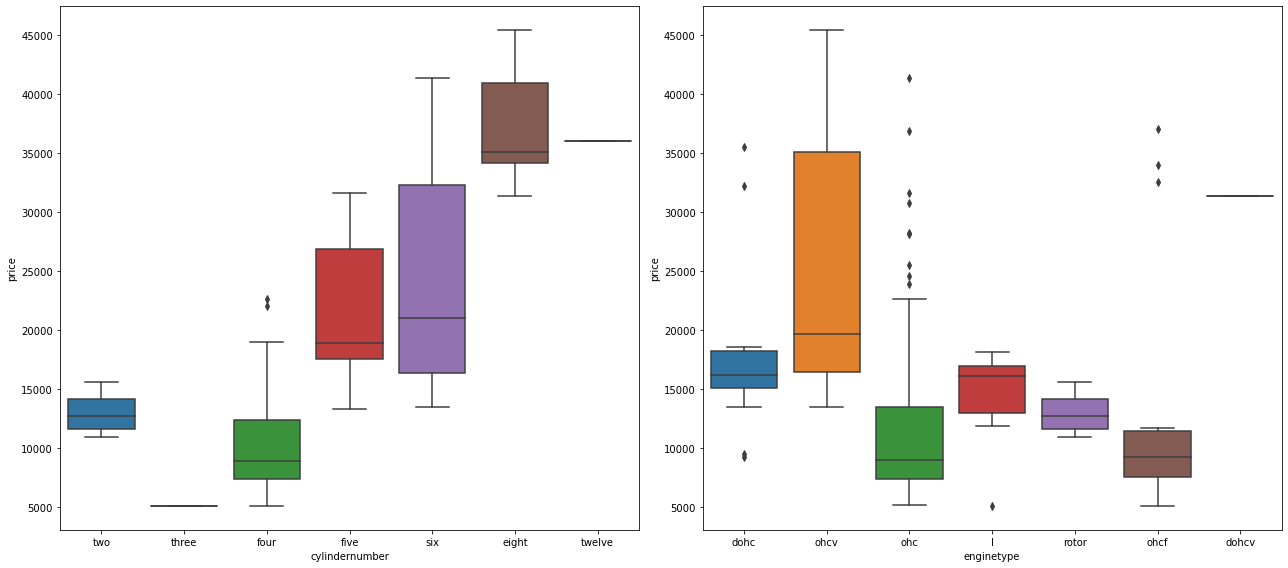

In [9]:
### Code here
fig, axes = plt.subplots(1,2,figsize=(18, 8))
sns.boxplot(ax=axes[0], data=car_price_df, x='cylindernumber', y='price',order=['two','three','four','five','six','eight','twelve'])
sns.boxplot(ax=axes[1], data=car_price_df, x='enginetype', y='price')

plt.tight_layout()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [9]:
#### Comment here

# From the histogram, we can see that car length is symmetrical, car width and curb weight are right skewed, and stroke is left skewed.
# From the bar chart, we can see that all three features are imbalanced.
# From the boxplot, we can see that both cylinder number and engine type have great influence on the car's price, since the price would change
# by a fairly big amount when the mean of each of the two features changes. 


------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
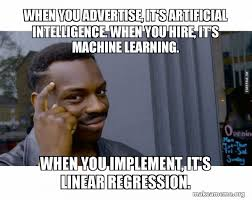



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [11]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0, 2, 100)
y = 7*X - 8 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

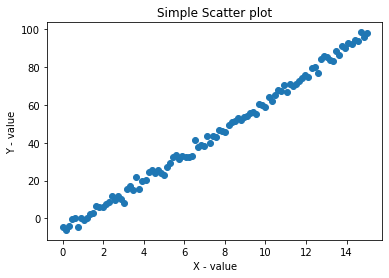

In [12]:
### Code here
plt.scatter(X, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

In [15]:
#### Comment here
# The features have linear relationship 

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [13]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

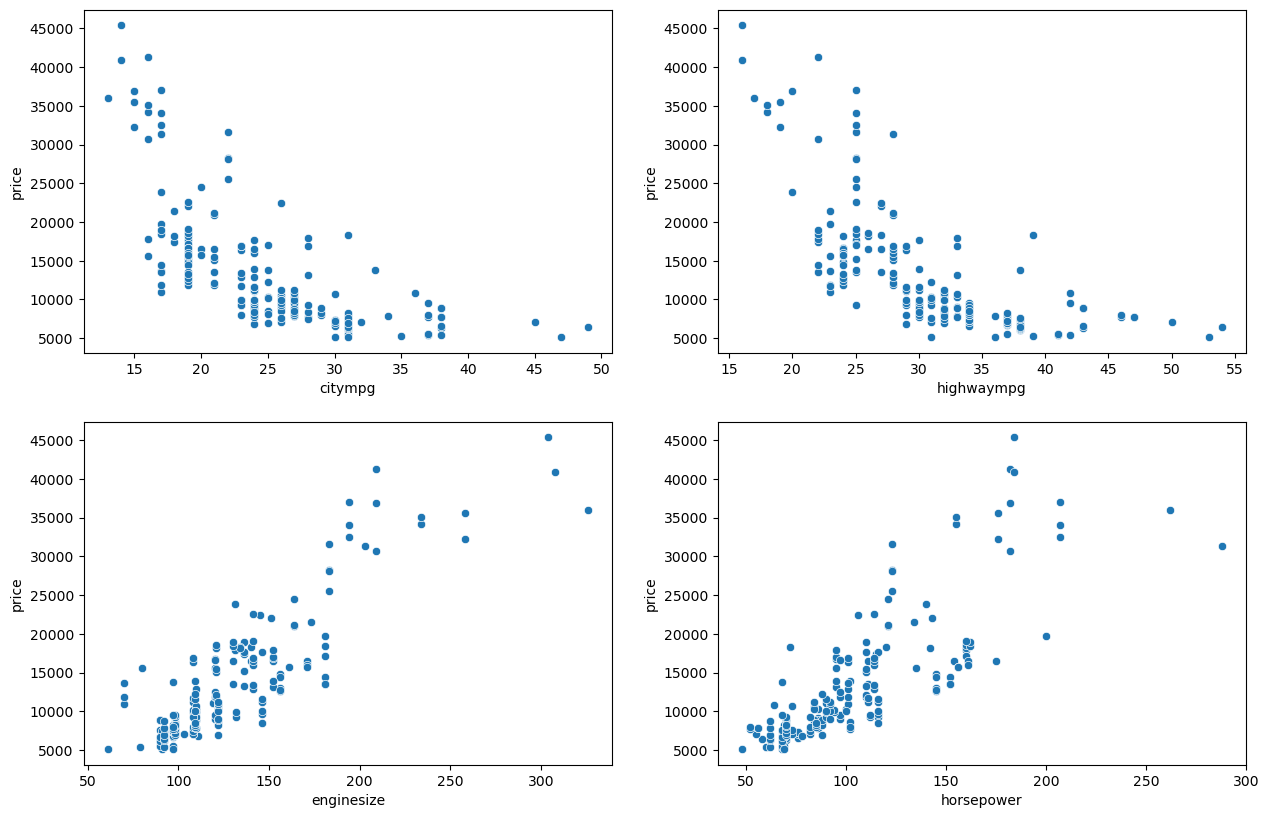

In [14]:
### Code here
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
num_features = ['citympg', 'highwaympg', 'enginesize', 'horsepower']
mixed_df = car_price_df[num_features]
for var, subplot in zip(num_features, ax.flatten()):
    sns.scatterplot(x=var, y=car_price_df['price'], data=mixed_df, ax=subplot)

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [14]:
#### Comment here
# yes, linear regression is a good model, as the visualization demonstrates a strong linear relationship between price 
# and each of the four features.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [16]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [58.73960331 14.90960935 25.63511292 37.6473623  65.28570897]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [17]:
### Code here
cat_variables = [
    "CarName",
    "fueltype",
    "aspiration",
    "doornumber",
    "carbody",
    "drivewheel",
    "enginelocation",
    "enginetype",
    "cylindernumber",
    "fuelsystem"
]

cat_df = car_price_df[cat_variables]
cat_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [18]:
for col in cat_variables:
    enc = OrdinalEncoder(categories=[list(car_price_X[col].unique())])
    car_price_X[col] = enc.fit_transform(car_price_X[col].to_numpy().reshape(-1,1))
car_price_X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.6,...,0.0,130,0.0,3.47,2.68,9.0,111,5000,21,27
1,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,88.6,...,0.0,130,0.0,3.47,2.68,9.0,111,5000,21,27
2,3,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,94.5,...,1.0,152,0.0,2.68,3.47,9.0,154,5000,19,26
3,4,2,3.0,0.0,0.0,1.0,2.0,1.0,0.0,99.8,...,0.0,109,0.0,3.19,3.40,10.0,102,5500,24,30
4,5,2,4.0,0.0,0.0,1.0,2.0,2.0,0.0,99.4,...,2.0,136,0.0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,140.0,0.0,0.0,1.0,2.0,0.0,0.0,109.1,...,0.0,141,0.0,3.78,3.15,9.5,114,5400,23,28
201,202,-1,141.0,0.0,1.0,1.0,2.0,0.0,0.0,109.1,...,0.0,141,0.0,3.78,3.15,8.7,160,5300,19,25
202,203,-1,142.0,0.0,0.0,1.0,2.0,0.0,0.0,109.1,...,1.0,173,0.0,3.58,2.87,8.8,134,5500,18,23
203,204,-1,146.0,1.0,1.0,1.0,2.0,0.0,0.0,109.1,...,1.0,145,6.0,3.01,3.40,23.0,106,4800,26,27


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [19]:
num_variables = [
    "symboling",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

num_df = car_price_df[num_variables]

In [20]:
### Code here
corr = num_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


In [21]:
num_df = num_df.drop(columns=['highwaympg'])
num_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26


In [22]:
#### Comment here
# if the columns are highly correlated, there might be an overfitting issue in the model and violates the independence assumption of linear regression

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [22]:
### Code here
car_price_dev_X, car_price_X_test, car_price_dev_y, car_price_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_dev_X, car_price_dev_y, test_size=0.25, random_state=0)

**2.1.8 Standardize the columns in the feature matrices.**

In [23]:
### Code here
scalar = StandardScaler()
car_price_X_train = scalar.fit_transform(car_price_X_train)
car_price_X_val = scalar.transform(car_price_X_val)
car_price_X_test = scalar.transform(car_price_X_test)

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [24]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 1.         -0.95500948  0.17546752 -0.94649987 -0.372678   -0.49236596
  -1.25        0.22451317  0.51671684 -0.12856487 -0.40974726 -0.46851364
  -0.00339972 -1.15016334 -0.55669184 -0.19930603 -0.42269467 -0.43428753
  -0.27820505 -0.66854906  1.03549495 -0.30391923 -0.09942571  0.83916558
   0.00909065  0.07554087]
 [ 1.         -1.44488923  0.17546752 -1.52147262 -0.372678   -0.49236596
   0.8         0.22451317 -1.24873236 -0.12856487  0.75843946  1.19517538
   0.41476539  0.71966069  0.89378352 -0.19930603  0.3418854   0.82259167
  -0.72261051 -0.08766405 -0.25186264 -0.32695051  0.44932771 -1.77525606
  -0.78958775 -0.80936648]
 [ 1.          1.79181626 -1.48472517  1.80336984 -0.372678    2.0310096
   0.8         1.47974592 -1.24873236 -0.12856487  0.89194651  1.17845488
   0.55415375  1.43576351  1.08794163 -0.19930603 -0.42269467  0.03122329
  -0.72261051  1.03780065 -0.38389932 -0.67241966  1.52070343  0.00255066
  -1.26879479 -1.25182016]
 [ 1.         -0.64008678 -0.654

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [31]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        inv_part = np.linalg.inv(np.dot(X.T, X) + self.alpha * np.identity(X.shape[1]))
        self.w = np.dot(inv_part, np.dot(X.T, y))
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = np.dot(X, self.w)

        return y_pred

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [32]:
### Code here
LR = LinearRegression()
LR.train(X_train, y_train)
y_pred = LR.predict(X_test)

**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

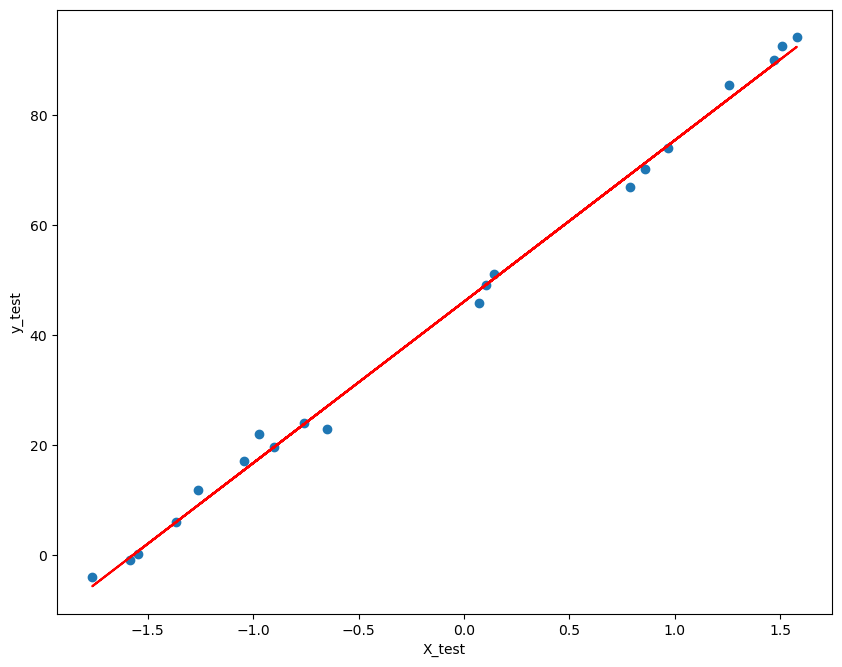

In [33]:
### Code here
plt.scatter(X_test[:, 1], y_test)
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.plot(X_test[:, 1], y_pred,"r")

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [38]:
### Code here
LR = LinearRegression(0)
LR.train(car_price_X_train, car_price_y_train)
car_price_y_train_pred = LR.predict(car_price_X_train)
car_price_y_val_pred = LR.predict(car_price_X_val)
car_price_y_test_pred = LR.predict(car_price_X_test)

print(f"R^2 on training set: {r2_score(car_price_y_train, car_price_y_train_pred)}")
print(f"R^2 on validation set: {r2_score(car_price_y_val, car_price_y_val_pred)}")
print(f"R^2 on test set: {r2_score(car_price_y_test, car_price_y_test_pred)}")

print(f"First 3 predictions: {car_price_y_test_pred[:3]}; First 3 actual labels: {car_price_y_test[:3]}")
print(f"Last 3 predictions: {car_price_y_test_pred[-3:]}; Last 3 actual labels: {car_price_y_test[-3:]}")


R^2 on training set: 0.933935817062337
R^2 on validation set: 0.8837591784574632
R^2 on test set: 0.8317747320406327
First 3 predictions: [ 6012.88506923 17745.98226719 16797.01559076]; First 3 actual labels: 52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64
Last 3 predictions: [ 7195.89570539 37262.78737265  6078.2294417 ]; Last 3 actual labels: 22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [41]:
### Code here
pred_base = sum(np.array(car_price_y_train))/len(np.array(car_price_y_train))

print(f"R^2 on training set: {r2_score(car_price_y_train, [pred_base for _ in range(len(car_price_y_train))])}")
print(f"R^2 on validation set: {r2_score(car_price_y_val, [pred_base for _ in range(len(car_price_y_val))])}")
print(f"R^2 on test set: {r2_score(car_price_y_test, [pred_base for _ in range(len(car_price_y_test))])}")

R^2 on training set: 0.0
R^2 on validation set: -0.04252409813108615
R^2 on test set: -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

Text(0.5, 0, 'feature')

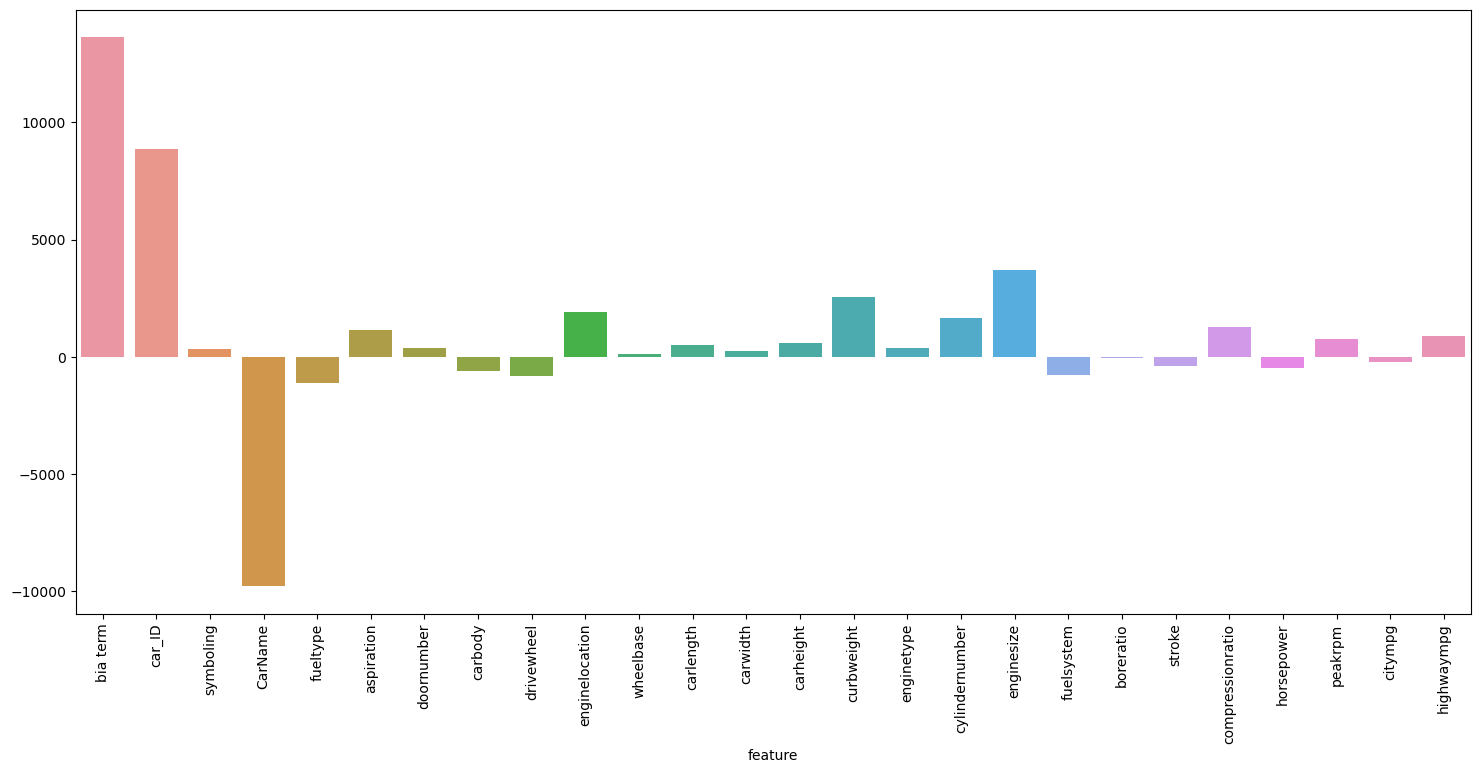

In [42]:
### Code here
fig=plt.figure(figsize=(18,8))
name=["bia term"]
name.extend(list(car_price_X.columns))
ax = sns.barplot(x=name, y=LR.w)
ax.tick_params(axis="x", rotation=90)
plt.xlabel("feature")

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [26]:
#### Comment here
# enginesize, curbweight, and engine location

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

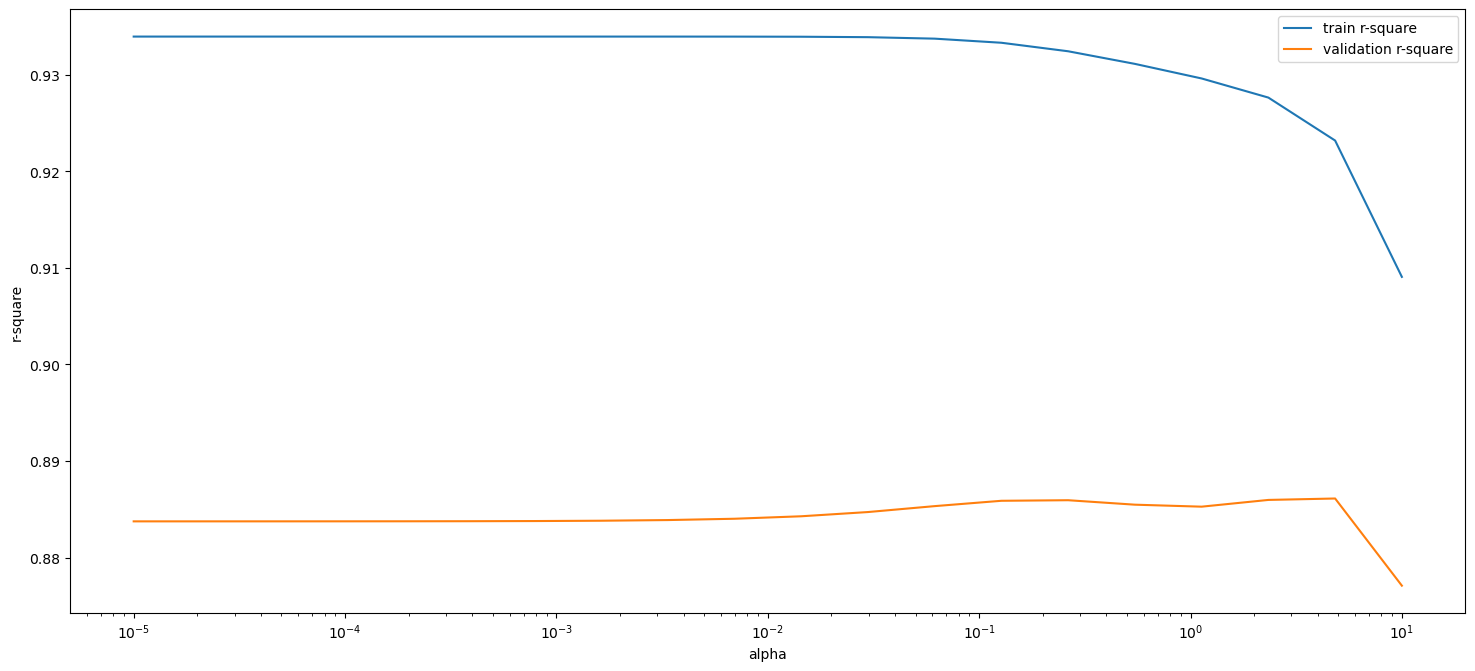

In [47]:
### Code here
train_score = list()
val_score = list()

for l in np.logspace(-5, 1, 20):
    LR = LinearRegression(alpha=l)
    LR.train(car_price_X_train, car_price_y_train)
    car_price_y_train_pred = LR.predict(car_price_X_train)
    car_price_y_val_pred = LR.predict(car_price_X_val)
    train_score.append(r2_score(car_price_y_train, car_price_y_train_pred))
    val_score.append(r2_score(car_price_y_val, car_price_y_val_pred))
fig = plt.figure(figsize=(18,8))
plt.plot(np.logspace(-5,1,20), train_score, label="train r-square")
plt.plot(np.logspace(-5,1,20), val_score, label="validation r-square")

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('r-square')
plt.legend()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [29]:
#### Comment here
# While alpha increases, there is a monotonic but mild decrease in train set R^2 and a monotonic but mild increase in validation R^2.
# When alpha reaches a certain point, there is a drastic decrease in both r-sqaure values

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [49]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [52]:
heart_disease_df.shape

(4238, 16)

#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [50]:
### Code here
heart_disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [53]:
heart_disease_df_new = heart_disease_df.dropna()

In [54]:
heart_disease_df_new.shape

(3656, 16)

In [30]:
#### Comment here
# There are missing values, need to drop rows with missing values 

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [56]:
### Code here
no_disease = heart_disease_df_new['TenYearCHD'].value_counts()[0]/ heart_disease_df_new['TenYearCHD'].count()
no_disease

0.8476477024070022

In [57]:
has_disease = heart_disease_df_new['TenYearCHD'].value_counts()[1]/ heart_disease_df_new['TenYearCHD'].count()
has_disease

0.15235229759299782

In [30]:
#### Comment here
# The distribution is very unbalanced. A balanced distribution would be 50% for each category, but currently it's 85% and 15%.

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [59]:
### Code here
features = heart_disease_df_new.drop(columns=['TenYearCHD'], axis=1)
features.corr()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749


In [31]:
#### Comment here

# All correlations are less than 0.9 so there is no need to drop any feature. 

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [63]:
heart_disease_X = heart_disease_df_new.drop(columns=['TenYearCHD'])
heart_disease_Y = heart_disease_df_new['TenYearCHD']

In [64]:
### Code here
from sklearn.pipeline import make_pipeline

# convert pandas series to numpy
heart_disease_Y = np.array(heart_disease_Y).reshape(-1,1)

# split dataset
X_dev, X_test, y_dev, y_test = train_test_split(heart_disease_X, heart_disease_Y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# standardize columns
imputer = make_pipeline(StandardScaler())

X_train = imputer.fit_transform(X_train, y = y_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# add ones
train_new = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, train_new))

val_new = np.ones((X_val.shape[0], 1))
X_val = np.hstack((X_val, val_new))

test_new = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, test_new))

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [65]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

Text(0.5, 0, 'epoch')

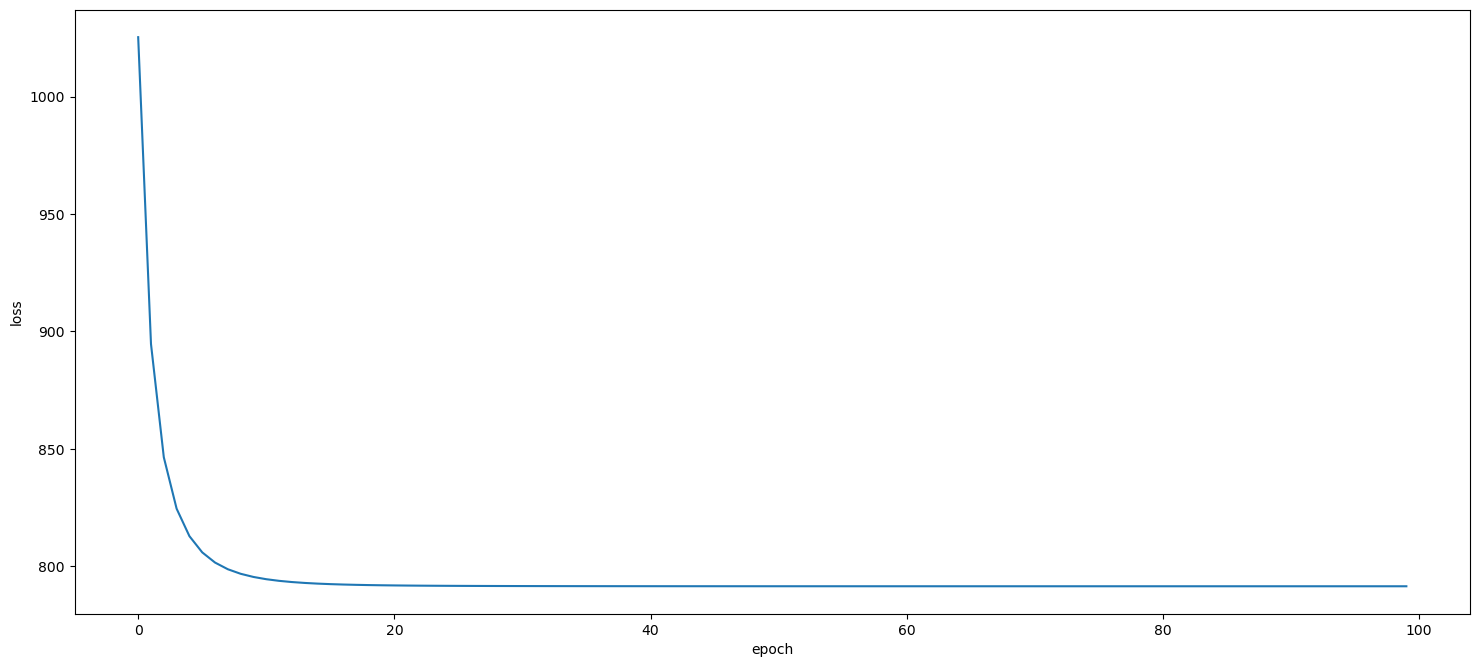

In [67]:
### Code here

# A. loss over epoch
logisticRegression = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logisticRegression.train(X_train, y_train)
fig = plt.figure(figsize = (18,8))
ax = sns.lineplot(x=range(100), y= np.asarray(loss).reshape(100,).astype(float))
ax.set_ylabel("loss")
ax.set_xlabel("epoch")

In [68]:
# B. hyperparameter tuning
t = np.random.randint(0,100,50)
alpha = np.random.rand(20)
eta = np.random.rand(20)/1000

loss_list = list()
pred_list = list()

for i in range(20):
    logisticRegression = LogisticRegression(alpha[i],t[i],eta[i])
    total_loss = logisticRegression.train(X_train, y_train)
    loss = logisticRegression.calculate_loss(X_val, y_val)
    y_pred_new = logisticRegression.predict(X_val)
    loss_list.append(loss)
    pred_list.append(y_pred_new)
    
best_t = t[np.argmin(loss_list)]
best_alpha = alpha[np.argmin(loss_list)]
best_eta = eta[np.argmin(loss_list)]

log_reg_best = LogisticRegression(best_alpha,best_t,best_eta)
loss = log_reg_best.train(X_train, y_train)
print ("Best t:", best_t)
print ("Best alpha:", best_alpha)
print ("Best eta:", best_eta)


Best t: 24
Best alpha: 0.016627973733867263
Best eta: 0.0002672625378814782


In [69]:
# C. compare accuracy
from sklearn.metrics import accuracy_score
accuracy_case_1 = accuracy_score(y_test, logisticRegression.predict(X_test))
accuracy_case_2 = accuracy_score(y_test, log_reg_best.predict(X_test))
print ("Accuracy case 1:", accuracy_case_1)
print ("Accuracy case 2:", accuracy_case_2)

Accuracy case 1: 0.8538251366120219
Accuracy case 2: 0.855191256830601


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [34]:
# No, because the accuracy for both cases are fairly the same

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

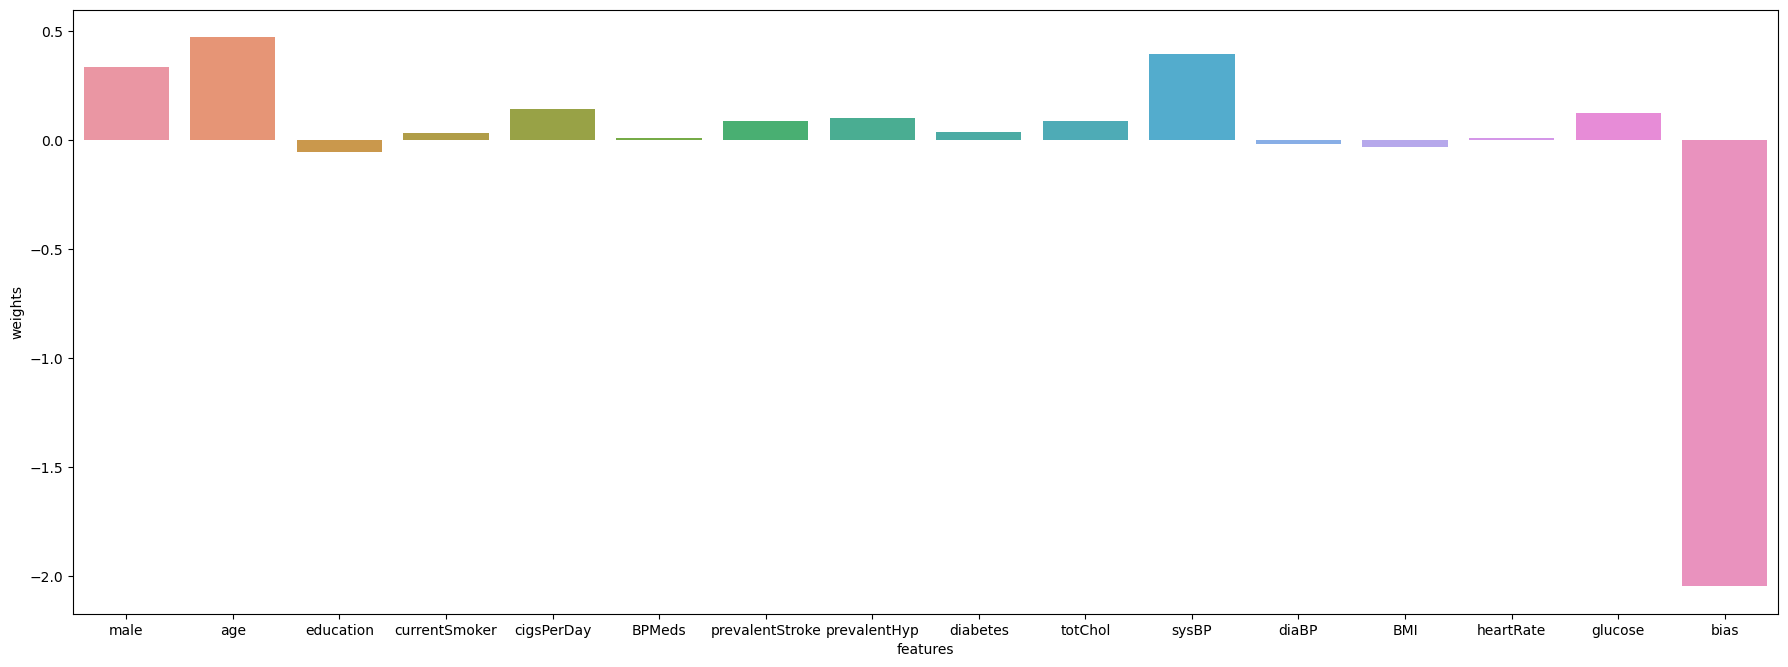

In [79]:
### Code here
features_heart_disease = heart_disease_X.columns.values.tolist()
features_heart_disease.extend(['bias'])

weight = []
for i in logisticRegression.w:
    weight.append(i[0])
    
fig = plt.figure(figsize = (22,8))
    
df = pd.DataFrame({'features': features_heart_disease, 'weights':weight})
ax = sns.barplot(x = 'features', y = 'weights', data = df)

In [35]:
#### Comment here
# This model is very biased. Age has a significant role in determining the heart disease.


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [81]:
### Code here
primal_svm = LinearSVC(tol=0.0001, C=1.0, dual = False )
primal_svm.fit(X_train,y_train)

predit_train = accuracy_score(primal_svm.predict(X_train),y_train)
predit_val = accuracy_score(primal_svm.predict(X_val),y_val)
predit_test = accuracy_score(primal_svm.predict(X_test),y_test)

print("Accuracy on training set: ", predit_train)
print("Accuracy on validation set: ", predit_val)
print("Accuracy on test set: ", predit_test)

Accuracy on training set:  0.8613771089831281
Accuracy on validation set:  0.8207934336525308
Accuracy on test set:  0.8524590163934426


/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [82]:
### Code here
dual_svm = SVC(C=1, kernel = "linear")
dual_svm.fit(X_train,y_train)

predit_train_dual = accuracy_score(dual_svm.predict(X_train),y_train)
predit_val_dual = accuracy_score(dual_svm.predict(X_val),y_val)
predit_test_dual = accuracy_score(dual_svm.predict(X_test),y_test)

print("Accuracy on training set: ", predit_train_dual)
print("Accuracy on validation set: ", predit_val_dual)
print("Accuracy on test set: ", predit_test_dual)

/Users/zhangxueqing/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set:  0.8568171454628363
Accuracy on validation set:  0.8166894664842681
Accuracy on test set:  0.8510928961748634
